In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings


2.4.0-rc4


In [67]:
data = pd.read_csv("price_train.csv").sample(frac=1)

data.head(5)

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
533,702,3652078,False,100%,within a day,1,True,2,Queen Anne,Boat,...,1,1,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",$100.00,180,1095,False,moderate,$75.00
814,6458,24728697,True,100%,within an hour,1,True,4,West Seattle,House,...,2,3,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",Heating...",$75.00,2,26,False,strict_14_with_grace_period,$225.00
2254,113,338091,False,100%,within an hour,3,True,4,Capitol Hill,Apartment,...,1,2,Real Bed,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",$60.00,1,365,False,strict_14_with_grace_period,$165.00
2516,5046,21161209,True,100%,within an hour,2,True,1,Ballard,Apartment,...,1,1,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free street parki...",$35.00,2,21,True,moderate,$95.00
1821,3227,15131800,False,100%,within an hour,2,False,4,Other neighborhoods,Apartment,...,1,1,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets allo...",$50.00,2,29,False,flexible,$78.00


In [68]:
data.shape

(3466, 25)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3466 entries, 533 to 2908
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X1                            3466 non-null   int64  
 1   id                            3466 non-null   int64  
 2   host_is_superhost             3466 non-null   bool   
 3   host_response_rate            3466 non-null   object 
 4   host_response_time            3466 non-null   object 
 5   host_listings_count           3466 non-null   int64  
 6   host_identity_verified        3466 non-null   bool   
 7   accommodates                  3466 non-null   int64  
 8   neighbourhood_group_cleansed  3466 non-null   object 
 9   property_type                 3466 non-null   object 
 10  room_type                     3466 non-null   object 
 11  latitude                      3466 non-null   float64
 12  longitude                     3466 non-null   float64
 13  g

In [70]:
data.columns

Index(['X1', 'id', 'host_is_superhost', 'host_response_rate',
       'host_response_time', 'host_listings_count', 'host_identity_verified',
       'accommodates', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'latitude', 'longitude', 'guests_included', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'instant_bookable',
       'cancellation_policy', 'price'],
      dtype='object')

In [71]:
import re

# The price fields in our data frame
price_list = ["price","cleaning_fee"]

for col in price_list:
    data[col] = data[col].fillna("0")
    data[col] = data[col].apply(lambda x: float(re.compile('[^0-9eE.]').sub('', x)) if len(x)>0 else 0)

In [72]:
data['price'].head()

533      75.0
814     225.0
2254    165.0
2516     95.0
1821     78.0
Name: price, dtype: float64

<AxesSubplot:ylabel='price'>

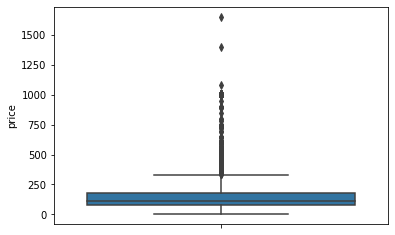

In [73]:
## Use a boxplot to check for high price values (outliers)
import seaborn as sns

sns.boxplot(y=data["price"] )

In [74]:
data["price"].skew()

3.6681708270389377

In [75]:
data["price"].kurtosis()

16.762334037096807

In [76]:
print(data['cancellation_policy'].value_counts())
print(data['property_type'].value_counts())
print(data['room_type'].value_counts())




strict_14_with_grace_period    1294
moderate                       1280
flexible                        651
strict                          167
super_strict_30                  67
super_strict_60                   7
Name: cancellation_policy, dtype: int64
Apartment             1158
House                 1079
Guest suite            343
Townhouse              292
Condominium            193
Guesthouse             105
Serviced apartment      89
Loft                    48
Bungalow                40
Aparthotel              26
Cottage                 18
Cabin                   12
Tiny house              12
Boat                     9
Camper/RV                9
Other                    7
Houseboat                7
Bed and breakfast        6
Hostel                   4
Tent                     3
Villa                    1
In-law                   1
Farm stay                1
Boutique hotel           1
Yurt                     1
Resort                   1
Name: property_type, dtype: int64
Entire h

In [77]:
data.describe()

,X1,id,host_listings_count,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,price
count,3466.000000,3.466000e+03,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.00000,3466.000000,3466.000000,3466.000000,3466.000000
mean,4501.088575,1.843582e+07,67.848817,3.761108,47.625409,-122.334011,2.114541,1.317802,1.378823,1.98240,69.577611,3.328621,595.884305,159.038950
std,2483.133761,8.885055e+06,211.743448,2.446790,0.045099,0.031438,1.836108,0.672634,1.051297,1.55458,58.357637,10.540059,530.773958,158.735786
min,1.000000,4.291000e+03,0.000000,1.000000,47.496037,-122.419637,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000
25%,2328.500000,1.197427e+07,1.000000,2.000000,47.605720,-122.353609,1.000000,1.000000,1.000000,1.00000,30.000000,1.000000,30.000000,79.000000
50%,4681.500000,2.024816e+07,2.000000,3.000000,47.620930,-122.332553,1.000000,1.000000,1.000000,1.00000,60.000000,2.000000,365.000000,115.000000
75%,6696.750000,2.546066e+07,10.750000,5.000000,47.658976,-122.312695,2.000000,1.000000,2.000000,2.00000,90.000000,2.000000,1125.000000,180.000000
max,8456.000000,3.223951e+07,1596.000000,28.000000,47.733955,-122.232314,16.000000,8.000000,8.000000,20.00000,430.000000,330.000000,1825.000000,1650.000000


In [78]:
data["property_type"].value_counts()

Apartment             1158
House                 1079
Guest suite            343
Townhouse              292
Condominium            193
Guesthouse             105
Serviced apartment      89
Loft                    48
Bungalow                40
Aparthotel              26
Cottage                 18
Cabin                   12
Tiny house              12
Boat                     9
Camper/RV                9
Other                    7
Houseboat                7
Bed and breakfast        6
Hostel                   4
Tent                     3
Villa                    1
In-law                   1
Farm stay                1
Boutique hotel           1
Yurt                     1
Resort                   1
Name: property_type, dtype: int64

In [79]:
# We now remove the rare occurences in categories as it's necessary for the cross validation step
# the below step is somewhat similar for what has been done with cities above

# We store the counts of each type in the variable item_counts
item_counts = data.groupby(['property_type']).size()

# Store a list of the rare property types here i.e. the types that have a count less than 10 
rare_items = list(item_counts.loc[item_counts <= 10].index.values)

# drop the property types that were rare
data = data[~data["property_type"].isin(rare_items)].reset_index(drop=True)

# Sanity check
data["property_type"].value_counts()

Apartment             1158
House                 1079
Guest suite            343
Townhouse              292
Condominium            193
Guesthouse             105
Serviced apartment      89
Loft                    48
Bungalow                40
Aparthotel              26
Cottage                 18
Cabin                   12
Tiny house              12
Name: property_type, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

train_set.head(5)


,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
2034,4755,20455588,False,90%,within an hour,3,False,6,Rainier Valley,Guest suite,...,2,4,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""F...",65.0,1,1125,True,moderate,135.0
2854,6007,23376436,True,100%,within an hour,42,True,4,Downtown,Condominium,...,1,1,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Pool,Kitc...",105.0,2,180,False,strict_14_with_grace_period,150.0
2174,6854,26079124,True,100%,within an hour,2,False,4,Downtown,Apartment,...,1,3,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",100.0,1,1123,True,moderate,140.0
2178,2107,10733212,True,100%,within a day,1,True,2,Queen Anne,Apartment,...,0,1,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,""Free stree...",70.0,1,30,False,strict_14_with_grace_period,106.0
2394,4766,20479407,False,100%,within an hour,123,False,2,Capitol Hill,House,...,1,1,Real Bed,"{Wifi,Kitchen,Heating,""Smoke detector"",""Carbon...",25.0,1,21,True,strict_14_with_grace_period,40.0


In [81]:
##  Similar to above encoding, here we encode binary 1, 0 for True and False

data["host_identity_verified"] = data["host_identity_verified"].apply(lambda x: 1 if x=="True" else 0)
data["host_is_superhost"] = data["host_is_superhost"].apply(lambda x: 1 if x=="True" else 0)

In [82]:
# We need to convert our categorical columns to numeric, so we use the sklearn's funtion LabelEncoder to do this
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for col in ["neighbourhood_group_cleansed"]:
    data[col+"_code"] = le.fit_transform(data[col])

In [83]:
data['neighbourhood_group_cleansed'].unique()

array(['West Seattle', 'Capitol Hill', 'Ballard', 'Other neighborhoods',
       'Downtown', 'Central Area', 'Cascade', 'Rainier Valley',
       'Northgate', 'University District', 'Delridge', 'Queen Anne',
       'Seward Park', 'Magnolia', 'Lake City', 'Beacon Hill', 'Interbay'],
      dtype=object)

In [84]:
data.columns

Index(['X1', 'id', 'host_is_superhost', 'host_response_rate',
       'host_response_time', 'host_listings_count', 'host_identity_verified',
       'accommodates', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'latitude', 'longitude', 'guests_included', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'instant_bookable',
       'cancellation_policy', 'price', 'neighbourhood_group_cleansed_code'],
      dtype='object')

In [85]:
data.head(5)

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price,neighbourhood_group_cleansed_code
0,6458,24728697,0,100%,within an hour,1,0,4,West Seattle,House,...,3,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",Heating...",75.0,2,26,False,strict_14_with_grace_period,225.0,16
1,113,338091,0,100%,within an hour,3,0,4,Capitol Hill,Apartment,...,2,Real Bed,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",60.0,1,365,False,strict_14_with_grace_period,165.0,2
2,5046,21161209,0,100%,within an hour,2,0,1,Ballard,Apartment,...,1,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free street parki...",35.0,2,21,True,moderate,95.0,0
3,3227,15131800,0,100%,within an hour,2,0,4,Other neighborhoods,Apartment,...,1,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets allo...",50.0,2,29,False,flexible,78.0,11
4,1159,6222790,0,100%,within a day,3,0,2,Other neighborhoods,House,...,1,Real Bed,"{Internet,Wifi,Kitchen,""Free street parking"",H...",60.0,30,200,False,strict_14_with_grace_period,65.0,11


In [86]:
from sklearn.model_selection import StratifiedShuffleSplit

## we will stratify according to city

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["neighbourhood_group_cleansed_code"]):
    del data["neighbourhood_group_cleansed_code"]
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [87]:
## Average price per area
strat_test_set.groupby("neighbourhood_group_cleansed")["price"].mean()

neighbourhood_group_cleansed
Ballard                150.513514
Beacon Hill             87.629630
Capitol Hill           134.871795
Cascade                123.259259
Central Area           138.293103
Delridge                81.789474
Downtown               232.821705
Interbay               100.000000
Lake City               95.909091
Magnolia               175.214286
Northgate               86.062500
Other neighborhoods    119.968000
Queen Anne             225.170213
Rainier Valley         124.645161
Seward Park             87.714286
University District     93.800000
West Seattle           163.222222
Name: price, dtype: float64

In [88]:
# Data Visualization
traval = strat_train_set.copy()

In [90]:
PROJECT_ROOT_DIR = "D:\\deeplearning\\ejam_assignment"
# CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [91]:
# Let's narrow our visual map and remove locations outside the main area
traval_co = traval[(traval["longitude"]>151.16)&(traval["latitude"]<-33.75)].reset_index(drop=True)

traval_co = traval_co[traval_co["latitude"]>-33.95].reset_index(drop=True)

# And only look at locations under $600
traval_co = traval_co[traval_co["price"]<600].reset_index(drop=True)

In [92]:
traval_co.shape

(0, 25)

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

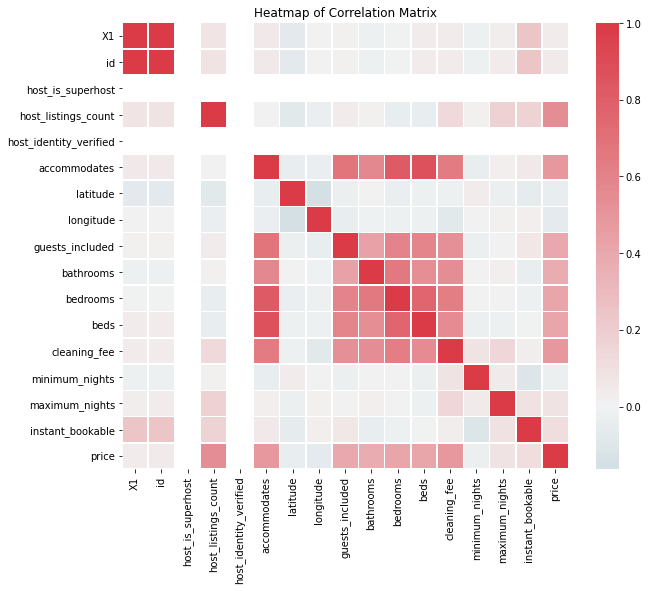

In [93]:
# Now let's explore our correlation matrix

corr_matrix = traval.corr()

# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10,as_cmap = True)

#Deep dive into diverging_pattern
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values,
           yticklabels=corr_matrix.columns.values, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [94]:
corr_matrix["price"].sort_values(ascending=False)

price                     1.000000
host_listings_count       0.544903
cleaning_fee              0.484314
accommodates              0.482912
bedrooms                  0.416803
beds                      0.411484
guests_included           0.401567
bathrooms                 0.379158
instant_bookable          0.107803
maximum_nights            0.086065
id                        0.042754
X1                        0.038241
minimum_nights           -0.022442
latitude                 -0.035130
longitude                -0.064209
host_is_superhost              NaN
host_identity_verified         NaN
Name: price, dtype: float64

Saving figure scatter_matrix_plot


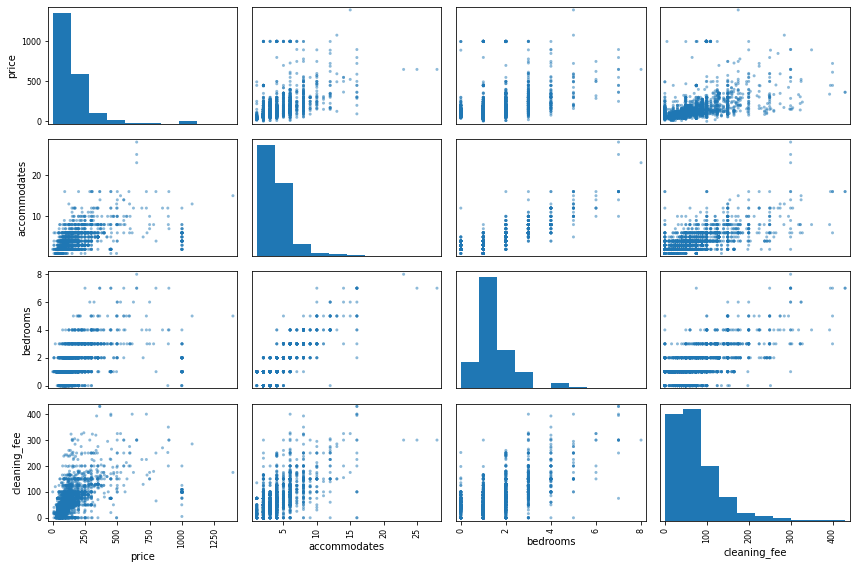

In [95]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["price", "accommodates", "bedrooms",
              "cleaning_fee"]
scatter_matrix(traval[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


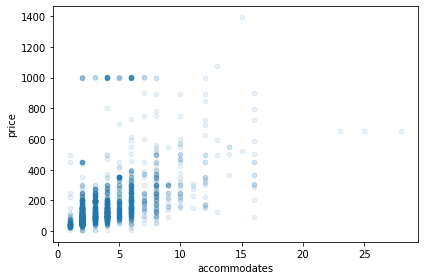

In [96]:
traval.plot(kind="scatter", x="accommodates", y="price", alpha=0.1)
save_fig("income_vs_house_value_scatterplot")

In [97]:
traval.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
1038,6225,23996840,0,100%,within an hour,1,0,3,Delridge,Guesthouse,...,0,2,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",30.0,3,60,False,strict_14_with_grace_period,85.0
1681,6716,25522851,0,100%,within an hour,1,0,2,West Seattle,Guest suite,...,1,1,Real Bed,"{TV,Wifi,""Free street parking"",""Indoor firepla...",30.0,2,21,True,moderate,95.0
3265,479,2197982,0,100%,within an hour,1,0,2,Northgate,Guesthouse,...,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",60.0,2,1125,False,moderate,80.0
1883,4607,20032556,0,100%,within an hour,1,0,2,Downtown,Apartment,...,0,1,Real Bed,"{TV,Wifi,Kitchen,Elevator,Heating,Washer,Dryer...",75.0,1,1125,True,strict_14_with_grace_period,135.0
1004,7074,26922390,0,100%,within an hour,1,0,4,West Seattle,Guest suite,...,1,1,Real Bed,"{TV,Wifi,""Air conditioning"",""Free street parki...",25.0,2,31,True,moderate,99.0


In [33]:
traval.columns

Index(['X1', 'id', 'host_is_superhost', 'host_response_rate',
       'host_response_time', 'host_listings_count', 'host_identity_verified',
       'accommodates', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'latitude', 'longitude', 'guests_included', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'instant_bookable',
       'cancellation_policy', 'price'],
      dtype='object')

In [98]:
traval.drop(['latitude', 'longitude', 'neighbourhood_group_cleansed', 'property_type'], axis=1, inplace=True)

In [99]:
traval.head(5)

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,room_type,guests_included,...,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
1038,6225,23996840,0,100%,within an hour,1,0,3,Entire home/apt,2,...,0,2,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",30.0,3,60,False,strict_14_with_grace_period,85.0
1681,6716,25522851,0,100%,within an hour,1,0,2,Entire home/apt,1,...,1,1,Real Bed,"{TV,Wifi,""Free street parking"",""Indoor firepla...",30.0,2,21,True,moderate,95.0
3265,479,2197982,0,100%,within an hour,1,0,2,Entire home/apt,2,...,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",60.0,2,1125,False,moderate,80.0
1883,4607,20032556,0,100%,within an hour,1,0,2,Entire home/apt,2,...,0,1,Real Bed,"{TV,Wifi,Kitchen,Elevator,Heating,Washer,Dryer...",75.0,1,1125,True,strict_14_with_grace_period,135.0
1004,7074,26922390,0,100%,within an hour,1,0,4,Entire home/apt,2,...,1,1,Real Bed,"{TV,Wifi,""Air conditioning"",""Free street parki...",25.0,2,31,True,moderate,99.0


In [100]:
for col in ['host_identity_verified', 'room_type', 'bed_type','cancellation_policy']:
    traval[col] = traval[col].astype('category')

In [101]:
# define our target
target = traval[["price"]]

# define our features 
features = traval.drop(["price"], axis=1)


In [102]:
num_feats = features.select_dtypes(include=['float64', 'int64', 'bool']).copy()

# one-hot encoding of categorical features
cat_feats = features.select_dtypes(include=['category']).copy()
cat_feats = pd.get_dummies(cat_feats)

In [103]:
features_recoded = pd.concat([num_feats, cat_feats], axis=1)

In [104]:
print(features_recoded.shape)
features_recoded.head(2)


(2732, 27)


,X1,id,host_is_superhost,host_listings_count,accommodates,guests_included,bathrooms,bedrooms,beds,cleaning_fee,...,bed_type_Airbed,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
1038,6225,23996840,0,1,3,2,1.0,0,2,30.0,...,0,0,0,1,0,0,0,1,0,0
1681,6716,25522851,0,1,2,1,1.0,1,1,30.0,...,0,0,0,1,0,1,0,0,0,0


In [105]:
from sklearn.model_selection import train_test_split
# import metrics
from sklearn.metrics import mean_squared_error, r2_score

# split our data
X_train, X_test, y_train, y_test = train_test_split(features_recoded, target, test_size=0.2)

In [106]:
# scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

#Reshaping ti fit the scaler
Y_train = Y_train.reshape((len(y_train), 1)) 

Y_train = sc.fit_transform(y_train)

#Restoring the original shape after scaling
Y_train = y_train.ravel()

In [107]:
# create a baseline
booster = xgb.XGBRegressor()

<IPython.core.display.Javascript object>

In [108]:
from sklearn.model_selection import GridSearchCV

# create Grid
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

{'colsample_bytree': 1, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [109]:
# instantiate xgboost with best parameters
booster = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                           max_depth=6, n_estimators=200, random_state=4)

# train
booster.fit(X_train, y_train)

# predict
y_pred_train = booster.predict(X_train)
y_pred_test = booster.predict(X_test)

<IPython.core.display.Javascript object>

In [110]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: {round(RMSE, 4)}")

RMSE: 82.8446


In [111]:
r2 = r2_score(y_test, y_pred_test)
r2
print(f"r2: {round(r2, 4)}")

r2: 0.7483


In [129]:
# Saving the predictions in excel file

solution = pd.DataFrame(y_pred_test, columns = ['price'])
solution.to_csv('airbnb_price_listing.csv', index = False)